<a href="https://colab.research.google.com/github/aj1m0n/BNO055_compass/blob/master/compass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

In [11]:
data = pd.read_csv('/content/drive/My Drive/mobile/pu/hiroshimadx/mag/data3.csv',header=None)

In [12]:
data.max()

0    40.50
1    37.88
2    38.25
dtype: float64

In [13]:
data.min()

0   -39.25
1   -36.75
2   -36.50
dtype: float64

In [14]:
(38.56 - (32.75))/2

2.905000000000001

In [15]:
(27.06 - (25.56))/2

0.75

In [16]:
(29.75 - (32.06))/2

-1.1550000000000011

In [17]:
from matplotlib import pyplot as plt

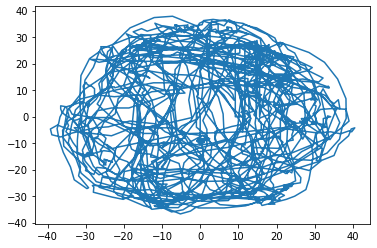

In [18]:
plt.plot(data[0], data[1])

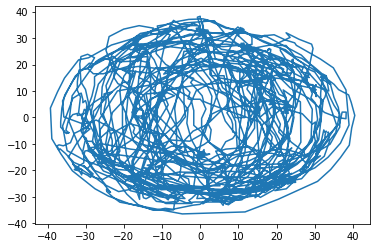

In [19]:
plt.plot(data[0], data[2])

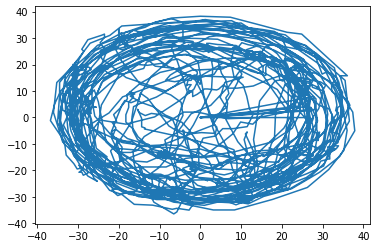

In [20]:
plt.plot(data[1], data[2])

In [21]:
data[4] = data[0] - 2.905000000000001

In [22]:
data[5] = data[1] - 0.75

In [23]:
data[6] = data[2] - (-1.1550000000000011)

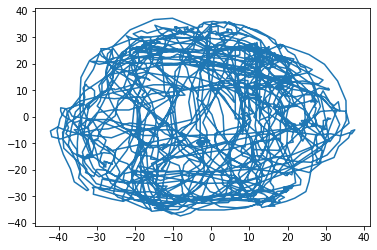

In [24]:
plt.plot(data[4], data[5])

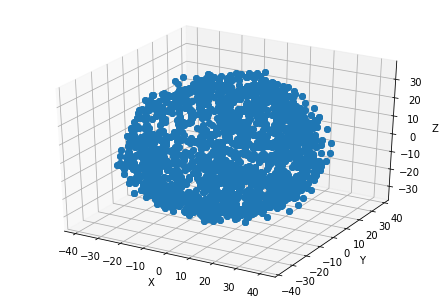

In [27]:

fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#.plotで描画
#linestyle='None'にしないと初期値では線が引かれるが、3次元の散布図だと大抵ジャマになる
#markerは無難に丸
ax.plot(data[0],data[1],data[2],marker="o",linestyle='None')

#最後に.show()を書いてグラフ表示
plt.show()

In [28]:

import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

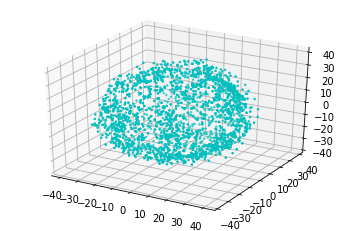

[-0.71934013 -0.42655574  1.44813255 33.37896224]


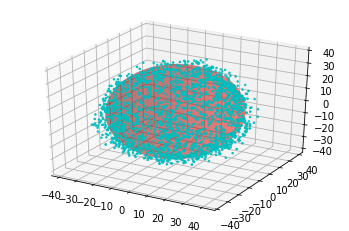

In [40]:

#球面フィッティング
def SS_fit(data) : 
    #x,y,z要素取り出し
    x = data[:,[0]]
    y = data[:,[1]]
    z = data[:,[2]]

    #データの長さを格納（n = Σ1)    
    n = len(x)
    
    #それぞれの要素の二乗を求める
    x2 = np.power(x,2)
    y2 = np.power(y,2)
    z2 = np.power(z,2)


    #違う要素との積を求める
    xy = x*y
    xz = x*z
    yz = y*z

    #右辺の数値用
    E = -x*(x2+y2+z2)
    F = -y*(x2+y2+z2)
    G = -z*(x2+y2+z2)
    H =   -(x2+y2+z2)
    


    #要素の総和に変換
    x = np.sum(x)
    y = np.sum(y)
    z = np.sum(z)

    x2 = np.sum(x2)
    y2 = np.sum(y2)
    z2 = np.sum(z2)

    xy = np.sum(xy)
    xz = np.sum(xz)
    yz = np.sum(yz)    

    E = np.sum(E)
    F = np.sum(F)
    G = np.sum(G)
    H = np.sum(H)

    #左辺の4×4行列を作る
    K = np.array([  [x2,xy,xz,x],
                    [xy,y2,yz,y],
                    [xz,yz,z2,z],
                    [x,y,z,n]])
    
    #右辺の4×1行列を作る
    L = np.array([E,F,G,H])

    #A,B,C,Dの行列を計算
    P = np.dot(np.linalg.inv(K),L)

    A = P[0]
    B = P[1]
    C = P[2]
    D = P[3]

    #中心座標と半径に変換
    x0 = (-1/2)* A
    y0 = (-1/2)* B
    z0 = (-1/2)* C
    r  = pow(pow(x0,2)+pow(y0,2)+pow(z0,2)-D,1/2)
    
    return np.array([x0,y0,z0,r])



#メイン

#csvファイル読み込み
Mag = np.loadtxt("/content/drive/My Drive/mobile/pu/hiroshimadx/mag/data3.csv" ,delimiter=',')

#x,y,z軸分離
MagX = Mag[:,[0]]
MagY = Mag[:,[1]]
MagZ = Mag[:,[2]]

#3Dプロット
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(MagX, MagY, MagZ,color="c",s=2)
plt.show()

#球面フィッティング
S = SS_fit(Mag)

#球面フィッティング後の4変数を表示
print(S)

#中心を0に移動
MagX = MagX - S[0]
MagY = MagY - S[1]
MagZ = MagZ - S[2]

# Create a sphere
r = S[3]
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#3Dプロット(中心0)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(MagX, MagY, MagZ,color="c",s=2)

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='r', alpha=0.3, linewidth=0)
plt.show()

# 加速度と地磁気センサを用いる

In [46]:
import math

In [44]:
data4 = pd.read_csv('/content/drive/My Drive/mobile/pu/hiroshimadx/mag/data4.csv',header=None)

In [45]:
data4.head()

,0,1,2,3,4,5
0,-12.69,-20.87,18.50,4.61,-2.00,-8.36
1,-12.69,-20.87,18.50,4.80,-1.73,-8.03
2,-12.25,-18.19,22.56,4.26,-2.66,-6.77
3,-12.25,-18.19,22.56,4.77,-3.94,-7.52
4,-13.75,-14.06,23.25,4.48,-3.41,-6.99


In [49]:
def roll(ay,az):
  return math.atan2(ay,az)

def pitch(ax,ay,az):
  return math.atan2(ax,math.sqrt(ay**2 + az**2))

In [59]:
def compass(roll,pitch,mgx,mgy,mgz):
  Dx = math.cos(pitch)*mgx + math.sin(pitch)*math.sin(roll)*mgy + math.sin(pitch)*math.cos(roll)*mgz
  Dy = math.cos(roll)*mgy - math.sin(roll)*mgz
  Dz = -math.sin(pitch)*mgx + math.cos(pitch)*math.sin(roll)*mgy + math.cos(pitch)*math.cos(roll)*mgz
  return Dx,Dy,Dz

In [61]:
yaw_list = []
for index, row in data4.iterrows():

  Dx,Dy,Dz = compass(roll(row[4], row[5]), pitch(row[3], row[4], row[5]), row[0] - row[0], row[1]- S[1], row[2] - S[2])
  yaw = math.atan2(-Dy,Dx)
  yaw_list.append(yaw)

In [63]:
yaw_list

[-1.8010189835230739,
 -1.8294526713355594,
 -1.8383064545736725,
 -1.768778085293772,
 -1.872865868785461,
 -1.805490014469082,
 -1.8405853081451065,
 -1.7208728309654684,
 -2.043400574815658,
 -1.7473388758177466,
 -1.6876240912271603,
 -1.8504408052369992,
 -1.9665442819572305,
 -1.7124857709337753,
 -1.8703833382155146,
 -1.9937265771629344,
 -2.085979697599439,
 -1.7259930949396414,
 -2.028234021699886,
 -1.9227464608066838,
 -2.125428565637745,
 -2.1500114933235652,
 -2.3941657317482408,
 -2.318738130943695,
 -2.4327455619509477,
 -2.376929977007366,
 -2.7043787507653025,
 -2.031035935602347,
 -2.5985327947137207,
 -2.193787552807541,
 -1.310312850802215,
 -1.7336875615473812,
 -2.852373019548066,
 -2.1308463081299314,
 -2.189467055679603,
 -1.5588528284055092,
 2.176209532193408,
 -1.1249569094461347,
 1.975825051284971,
 -0.9750487593450348,
 1.6145308533981773,
 0.9215731442970267,
 1.272881381046935,
 -0.04721191877833483,
 1.1444521667670577,
 0.9752553206552294,
 0.85068703

In [65]:
def orientation(n):
  return n * 180 / math.pi

In [69]:
ori_yaw_list = list(map(orientation,yaw_list))

In [70]:
ori_yaw_list

[-103.19078657881369,
 -104.81991688646167,
 -105.32720129872922,
 -101.34351918256388,
 -107.30730987550913,
 -103.44695778209234,
 -105.45776999050071,
 -98.59875029305127,
 -117.07822879154362,
 -100.11514296349075,
 -96.6937378319173,
 -106.02244837886963,
 -112.67468758173428,
 -98.1182071507124,
 -107.16507135133901,
 -114.2321183744998,
 -119.5178328224236,
 -98.89211980876425,
 -116.20924930824891,
 -110.16525727793915,
 -121.77808646758706,
 -123.18658447205986,
 -137.1755918840246,
 -132.85390869912658,
 -139.38605332897106,
 -136.1880558806499,
 -154.9494886237138,
 -116.36978714941894,
 -148.88496206343095,
 -125.69476792420531,
 -75.07539619272205,
 -99.3329802709921,
 -163.42893561709084,
 -122.08850024687803,
 -125.44722167337609,
 -89.31568794966681,
 124.68762153082153,
 -64.45528304534425,
 113.20643649484828,
 -55.86617872993758,
 92.5058037933706,
 52.80225168082045,
 72.93073095477291,
 -2.705043688713024,
 65.57227901035466,
 55.878013821222424,
 48.74077654027399